In [25]:
from src.database import DatabaseXRD,snip,Phase,MixPhase
from src.gaussnewton import GaussNewton
from src.spectra import Spectra
from numpy import newaxis,loadtxt,diag,histogram,arange,linspace,sin,concatenate,array,exp,pi,zeros,ones,prod,newaxis,arctan,savetxt,c_,fabs,sqrt,concatenate
from numpy.random import normal
from numpy.linalg import pinv,inv
from scipy.optimize import curve_fit,least_squares
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

from matplotlib.pyplot import plot,show,vlines,xlim,ylim,figure,semilogx,scatter,xlabel,ylabel,subplots,gca

from glob import glob

from scipy import signal
from numpy import fft,pad,concatenate,stack

from src.spectra import Spectra

In [26]:
def fce_calibration(x,a,beta,s):
    return (arctan((x+a)/s)) * 180 / pi + beta

In [27]:
database = DatabaseXRD().read_cifs('Database/')

calcite = database['Calcite'][0]
hydrocerussite = database['Hydrocerussite'][0]
cinnabar = database['Cinnabar'][2]
spinel = database['Spinel'][0]
barite = database['Barite'][0]

In [34]:
files = glob('Cappello/Cinnabar_Hydrocerussite/roi*.dat')
cnb_hcs = MixPhase([cinnabar,hydrocerussite])

xrd_gn = []
xrd_spectra = []

for file in files:
    
    spectra = Spectra(file)
    spectra.calibrate_from_file('Cappello/Calibrazione1.txt').convolve(1).raw_snip()
    
    spectra.opt_file[:] = array([-1164.1, 50.18,1976.6756648])
    spectra.opt[:] = array([-1164.1, 50.18,1976.6756648])
    
    xrd_spectra += [spectra]
    xrd_gn += [GaussNewton(cnb_hcs,spectra)]

(0.0, 1.0)

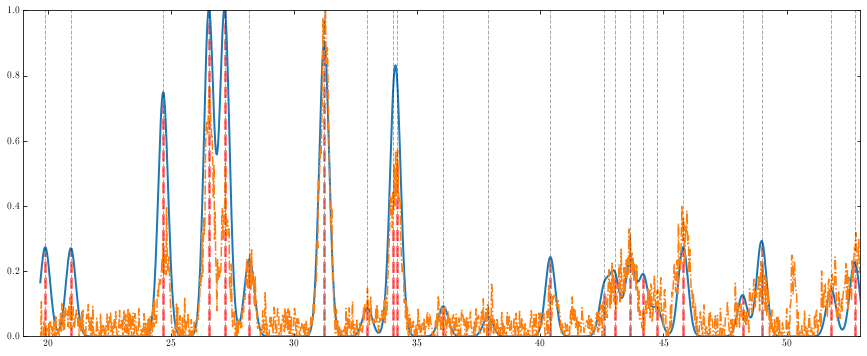

In [35]:
g = xrd_gn[0]
s = xrd_spectra[0]

figure(figsize=(15,6))

vlines(g.mu,0,g.i,'r',alpha=0.5,ls='--',lw=3)
plot(g.theta,g.z,'-',lw=2)
plot(s.theta,s.intensity,'-.')
vlines(g.mu,0,1,'k',alpha=0.33,ls='--',lw=1)


xlim(19,53)
ylim(0,1)

[-1164.79928371    50.18        1976.59574008] [9.8829787]
[-1151.21168234    50.18        1966.42520194] [9.83212601]
[-1163.49029593    50.18        1971.30806017] [9.8565403]
[-1154.40566653    50.18        1973.23809563] [9.86619048]
[-1154.12070097    50.18        1970.15833551] [9.85079168]
[-1158.18797983    50.18        1966.29678737] [9.83148394]
[-1148.45271669    50.18        1963.17824786] [9.81589124]
[-1147.98639945    50.18        1961.05445832] [9.80527229]


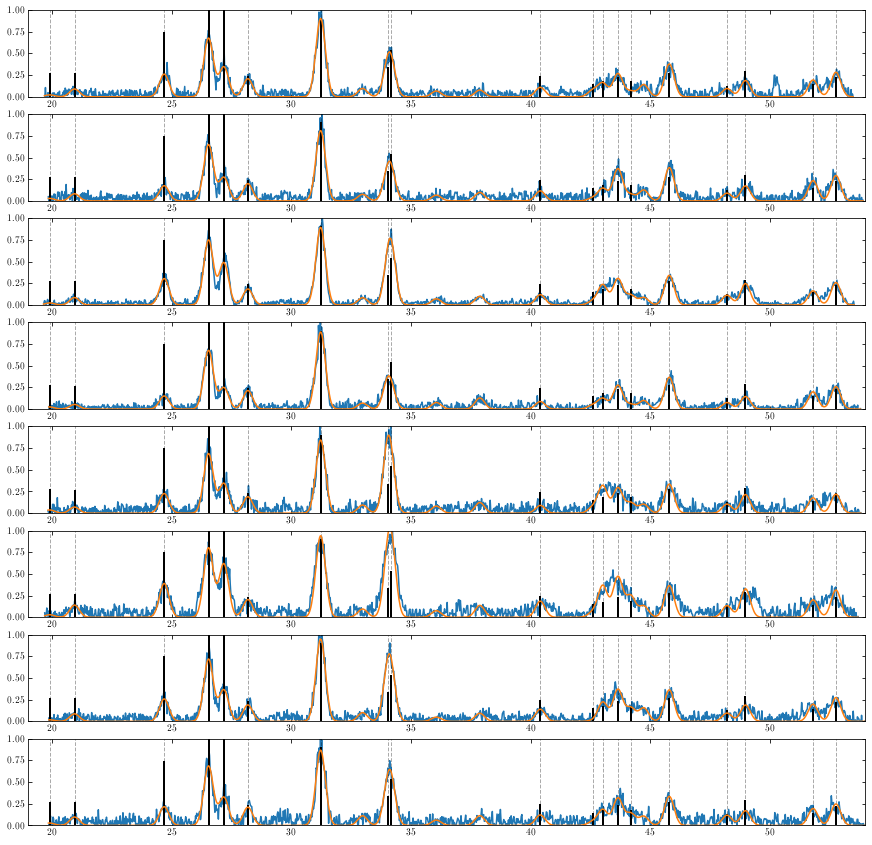

In [40]:
%matplotlib inline
fig,ax = subplots(len(xrd_spectra),1,figsize = (15,15))

for i,(spectra,gn) in enumerate(zip(xrd_spectra,xrd_gn)):
    
    for _ in range(32):
        gn.calibration_nobeta(alpha=1)
    print(gn.spectra.opt,gn.spectra.s * 5e-3)
    
    ax[i].plot(spectra.theta,spectra.intensity)
    
    x,y = cnb_hcs.get_theta(max_theta = 53,min_intensity=0.1)
    ax[i].vlines(x,0,y,'k',lw=2)
    ax[i].vlines(x,0,1.0,'k',lw=1,ls='--',alpha=0.33)
        
    ax[i].plot(gn.theta,gn.z)
    
    ax[i].set_xlim(19,54)
    ax[i].set_ylim(0,1)

[-1164.79928371    50.18        1976.59574008] [-1164.1          50.18       1976.6756648]
[-1151.21168234    50.18        1966.42520194] [-1164.1          50.18       1976.6756648]
[-1163.49029593    50.18        1971.30806017] [-1164.1          50.18       1976.6756648]
[-1154.40566653    50.18        1973.23809563] [-1164.1          50.18       1976.6756648]
[-1154.12070097    50.18        1970.15833551] [-1164.1          50.18       1976.6756648]
[-1158.18797983    50.18        1966.29678737] [-1164.1          50.18       1976.6756648]
[-1148.45271669    50.18        1963.17824786] [-1164.1          50.18       1976.6756648]
[-1147.98639945    50.18        1961.05445832] [-1164.1          50.18       1976.6756648]


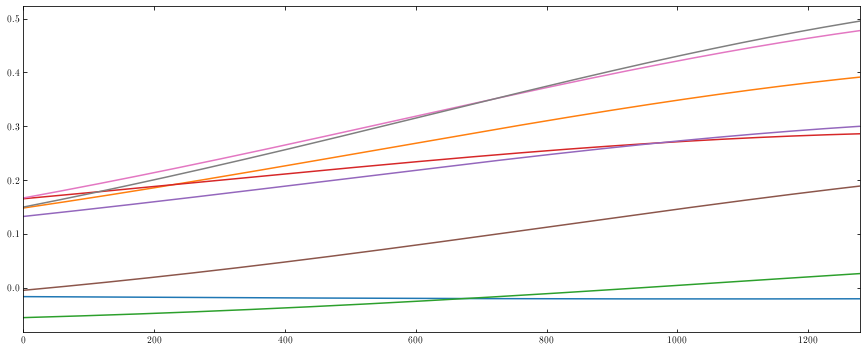

In [41]:
#fig,ax = subplots(len(xrd_spectra),1,figsize = (15,15))
figure(figsize=(15,6))

x = arange(0,1280)
for i,gn in enumerate(xrd_gn):
    opt = gn.spectra.opt
    opt_file = gn.spectra.opt_file
    print(opt,opt_file)
    
    y_new = fce_calibration(x,*opt)
    y_old = fce_calibration(x,*opt_file)
    
    plot(y_new-y_old)
    xlim(0,1280)
